In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jtiptj/chest-xray-pneumoniacovid19tuberculosis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumoniacovid19tuberculosis


In [2]:
import os
import shutil
import random

# Read-only dataset path
dataset_dir =  "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis"  
writable_dir = "/kaggle/working/dataset" 

# Copy dataset to a writable location
if not os.path.exists(writable_dir):
    shutil.copytree(dataset_dir, writable_dir)

# Define train, val, test directories
train_dir = os.path.join(writable_dir, "train")
val_dir = os.path.join(writable_dir, "val")
test_dir = os.path.join(writable_dir, "test")

# Create train, val, test directories
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Get all subfolders (classes)
subfolders = [f for f in os.listdir(writable_dir) if os.path.isdir(os.path.join(writable_dir, f))]

# Process each class folder separately
for subfolder in subfolders:
    subfolder_path = os.path.join(writable_dir, subfolder)

    # Get all images in this class
    all_images = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(all_images)  # Shuffle before splitting

    # Define split sizes
    train_split = int(0.7 * len(all_images))
    val_split = int(0.9 * len(all_images))  # 70% train, next 20% val, last 10% test

    # Create class-specific subdirectories
    os.makedirs(os.path.join(train_dir, subfolder), exist_ok=True)
    os.makedirs(os.path.join(val_dir, subfolder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, subfolder), exist_ok=True)

    # Move images to respective folders
    for i, img in enumerate(all_images):
        src_path = os.path.join(subfolder_path, img)

        if i < train_split:
            dest_path = os.path.join(train_dir, subfolder, img)
        elif i < val_split:
            dest_path = os.path.join(val_dir, subfolder, img)
        else:
            dest_path = os.path.join(test_dir, subfolder, img)

        shutil.move(src_path, dest_path)

print(f"Dataset split complete! ✅")
print(f"Train contains {len(os.listdir(train_dir))} classes.")
print(f"Validation contains {len(os.listdir(val_dir))} classes.")
print(f"Test contains {len(os.listdir(test_dir))} classes.")


Dataset split complete! ✅
Train contains 7 classes.
Validation contains 7 classes.
Test contains 7 classes.


Found 6326 files belonging to 7 classes.
Found 38 files belonging to 7 classes.
Found 771 files belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 122s 863ms/step - accuracy: 0.6617 - loss: 0.8902 - val_accuracy: 0.7895 - val_loss: 0.5038
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.9343 - loss: 0.1882 - val_accuracy: 0.8158 - val_loss: 0.4483
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.9448 - loss: 0.1440 - val_accuracy: 0.9211 - val_loss: 0.1396
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 43s 435ms/step - accuracy: 0.9531 - loss: 0.1222 - val_accuracy: 0.9211 - val_loss: 0.1454
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 438ms/step - accuracy: 0.9659 - loss: 0.0920 - val_accuracy: 0.9474 - val_loss: 0.1798
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.9679 - loss: 0.0786 - val_accuracy: 0.8947 - val_loss: 0.1407
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

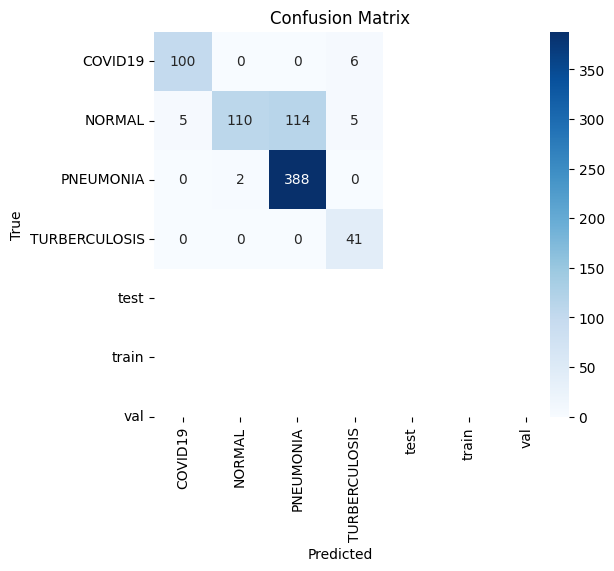

In [3]:
# UGG16 X ResNet Hybrid Model for classification: Higher accuracy score, so kept
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image

data_dir = "/kaggle/working/dataset"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

image_size = (224, 224)
batch_size = 64

train_dataset = keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=image_size, batch_size=batch_size, shuffle=True
)

val_dataset = keras.preprocessing.image_dataset_from_directory(
    val_dir, image_size=image_size, batch_size=batch_size, shuffle=False
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size=image_size, batch_size=batch_size, shuffle=False
)

class_names = train_dataset.class_names
num_classes = len(class_names)

normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: ((normalization_layer(x), normalization_layer(x)), y))
val_dataset = val_dataset.map(lambda x, y: ((normalization_layer(x), normalization_layer(x)), y))
test_dataset = test_dataset.map(lambda x, y: ((normalization_layer(x), normalization_layer(x)), y))

vgg16 = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False

resnet50 = keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
resnet50.trainable = False
vgg16_output = layers.Flatten()(vgg16.output)
resnet50_output = layers.Flatten()(resnet50.output)

merged = layers.concatenate([vgg16_output, resnet50_output])

x = layers.Dense(512, activation="relu")(merged)
x = layers.Dropout(0.15)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.05)(x)
x = layers.Dense(128, activation="relu")(x) 
output = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=[vgg16.input, resnet50.input], outputs=output)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

model.save("chest_disease.h5")
print("✅ Model saved successfully!")

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

y_true, y_pred = [], []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Update the classification_report call
print(classification_report(y_true, y_pred, target_names=class_names, labels=range(num_classes)))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9474 - val_loss: 0.1076
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.9909 - loss: 0.0286 - val_accuracy: 0.9737 - val_loss: 0.1052
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.9905 - loss: 0.0287 - val_accuracy: 0.8158 - val_loss: 0.6093
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step - accuracy: 0.9872 - loss: 0.0348 - val_accuracy: 0.9737 - val_loss: 0.1583
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 47s 476ms/step - accuracy: 0.9963 - loss: 0.0135 - val_accuracy: 0.8684 - val_loss: 0.2896
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 83s 490ms/step - accuracy: 0.9875 - loss: 0.0329 - val_accuracy: 0.8947 - val_loss: 0.2208
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 46s 466ms/step - accuracy: 0.9727 - loss: 0.0750 - val_accuracy: 0.9737 - val_loss: 0.1316
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 478ms/step - accuracy: 0.9957 - loss: 0.0174 - val_accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

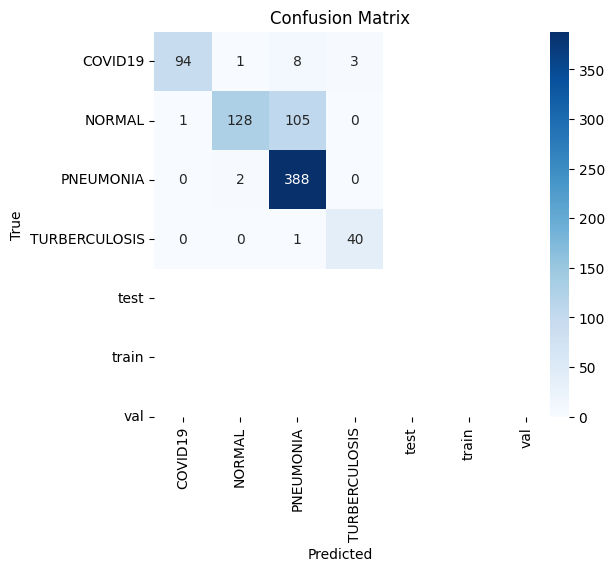

In [4]:
 history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)
model.save("chest_disease.h5")
print("✅ Model saved successfully!")

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

y_true, y_pred = [], []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Update the classification_report call
print(classification_report(y_true, y_pred, target_names=class_names, labels=range(num_classes)))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()